<a href="https://colab.research.google.com/github/mitesh98/Quora_Question_Pair_Similarity/blob/master/QuestionPairSimilarity_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
from datetime import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve
import spacy
from tqdm import tqdm
from datetime import datetime as dt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!cp "/content/drive/My Drive/Colab Notebooks/Quora_Final.csv" "Quora_Final.csv"

# Machine Learning Algorithm

In [ ]:
df_full = pd.read_csv('Quora_Final.csv')

In [ ]:
print("Shape of df_full dataframe:", df_full.shape, '\n')
print('*'*50, '\n')

print("Columns of df_full dataframe:\n")
print(df_full.columns)

Shape of df_full dataframe: (100000, 30) 

************************************************** 

Columns of df_full dataframe:

Index(['id', 'question1', 'question2', 'is_duplicate', 'freq_qid1',
       'freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words',
       'word_Common', 'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2',
       'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio'],
      dtype='object')


# Train Test Split

In [ ]:
x = df_full.drop(['is_duplicate', 'id'], axis = 1)
y = df_full['is_duplicate']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = False)

In [ ]:
print("Shape of x train data:", x_train.shape)
print("Shape of x test data:", x_test.shape)
print("Shape of y train data:", y_train.shape)
print("Shape of y test data:", y_test.shape)

Shape of x train data: (70000, 28)
Shape of x test data: (30000, 28)
Shape of y train data: (70000,)
Shape of y test data: (30000,)


# TFIDF Vectorizer on question1 and question2

# TFIDF Vectorizer on question1 and question2

<b>TFIDF vectorization on question2<b>

In [ ]:
# TFIDF vectorization on question1

tf_1 = TfidfVectorizer()

# Fit_transform train data of question2
tf_tr_q1 = tf_1.fit_transform(x_train['question1'].values.astype('U'))

# Transform test data of question1
tf_te_q1 = tf_1.transform(x_test['question1'].values.astype('U'))

<b>TFIDF vectorization on question2<b>

In [ ]:
# TFIDF vectorization on question2

tf_2 = TfidfVectorizer()

# Fit_transform train data of question2
tf_tr_q2 = tf_2.fit_transform(x_train['question2'].values.astype('U'))

# Transform test data of question2
tf_te_q2 = tf_2.transform(x_test['question2'].values.astype('U'))

<b>Horizontal stacking question pairs<b>

In [ ]:
# hstack on train data
tf_tr = hstack((tf_tr_q1, tf_tr_q2))

#hstack on test data
tf_te = hstack((tf_te_q1, tf_te_q2))

<b>Drop question1 and question2<b>

In [ ]:
# Drop question1 and question2 from train data
tf_tr_f = x_train.drop(['question1','question2'], axis=1)

# Drop question1 and question2 from test data
tf_te_f = x_test.drop(['question1','question2'], axis=1)

<b>Horizontal stacking to get final train and final test data<b>

In [ ]:
# hstack on train data
tf_tr_f = hstack((tf_tr_f, tf_tr)).tocsr()

#hstack on test data
tf_te_f = hstack((tf_te_f, tf_te)).tocsr()

In [ ]:
print("Type of tf_tr_f:", type(tf_tr_f),)
print("Type of tf_te_f:", type(tf_te_f), '\n')

print("Shape of tf_tr_f:", tf_tr_f.shape)
print("Shape of tf_te_f:", tf_te_f.shape)

Type of tf_tr_f: <class 'scipy.sparse.csr.csr_matrix'>
Type of tf_te_f: <class 'scipy.sparse.csr.csr_matrix'> 

Shape of tf_tr_f: (70000, 60010)
Shape of tf_te_f: (30000, 60010)


<b>Checking distribution of class 0 and 1<b>

In [ ]:
# Importing Counter library
from collections import Counter, defaultdict

print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6273285714285715 Class 1:  0.3726714285714286
---------- Distribution of output variable in train data ----------
Class 0:  0.37283333333333335 Class 1:  0.37283333333333335


# Defining 'plot_confusion_matrix' function to view confusion matrix in heatmap form

In [ ]:
# This function plots the confusion matrices given y_i, y_i_hat.

def plot_confusion_matrix(y_test, predict):
    
    C = confusion_matrix(y_test, predict)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
   
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    plt.style.use("seaborn-darkgrid")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot = True, fmt = ".3f", xticklabels = labels, yticklabels = labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot = True,fmt = ".3f", xticklabels = labels, yticklabels = labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot = True, fmt = ".3f", xticklabels = labels, yticklabels = labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")

# Defining 'ml' function for LogisticRegression and Linear SVM

In [ ]:
# Defining 'ml' function for LogisticRegression and Linear SVM

# Importing library
from sklearn.linear_model import SGDClassifier
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_curve


def ml(x_tr, x_te, y_tr, y_te, los):
    
    alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

    error_array = []

    for i in alpha:
    
        clf = SGDClassifier(alpha = i, penalty='l2', loss = los, n_jobs = -1)
        clf.fit(x_tr, y_tr)
        sig_clf = CalibratedClassifierCV(clf, method = "sigmoid")
        sig_clf.fit(x_tr, y_tr)
        predict = sig_clf.predict_proba(x_te)
        error_array.append(log_loss(y_te, predict, labels = clf.classes_, eps = 1e-15))
        print('For values of alpha = ', i, "The loss is:", log_loss(y_te, predict, labels = clf.classes_, eps = 1e-15))

    fig, ax = plt.subplots()
    ax.plot(alpha, error_array, c = 'g')
    for i, txt in enumerate(np.round(error_array, 3)):
        ax.annotate((alpha[i],np.round(txt,3)), (alpha[i], error_array[i]))
    plt.grid()
    plt.title("Cross Validation Error for each alpha")
    plt.xlabel("Alpha i's")
    plt.ylabel("Error measure")

    best_alpha = np.argmin(error_array)
    clf = SGDClassifier(alpha = alpha[best_alpha], penalty = 'l2', loss = los)
    clf.fit(x_tr, y_tr)
    sig_clf = CalibratedClassifierCV(clf, method = "sigmoid")
    sig_clf.fit(x_tr, y_tr)

    predict = sig_clf.predict_proba(x_tr)
    print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:", log_loss(y_tr, predict, labels = clf.classes_, eps = 1e-15))
    predict = sig_clf.predict_proba(x_te)
    print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:", log_loss(y_te, predict, labels = clf.classes_, eps = 1e-15))
    predicted =np.argmax(predict, axis=1)
    print("Total number of data points :", len(predicted))
    plot_confusion_matrix(y_te, predicted)

# Calling 'ml' function for logistic regression

For values of alpha =  1e-05 The loss is: 0.41358904376306066
For values of alpha =  0.0001 The loss is: 0.4126350459006137
For values of alpha =  0.001 The loss is: 0.4307379220961485
For values of alpha =  0.01 The loss is: 0.4535298288706359
For values of alpha =  0.1 The loss is: 0.4669605478899021
For values of alpha =  1 The loss is: 0.5022421741600571
For values of alpha =  10 The loss is: 0.5514077596424671
For values of best alpha =  0.0001 The train log loss is: 0.41618557435096143
For values of best alpha =  0.0001 The test log loss is: 0.427358260189266
Total number of data points : 30000


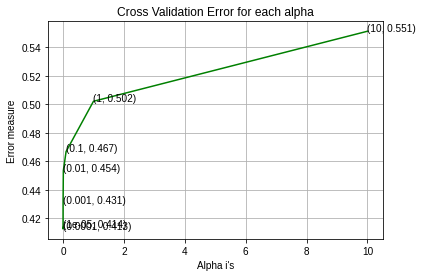

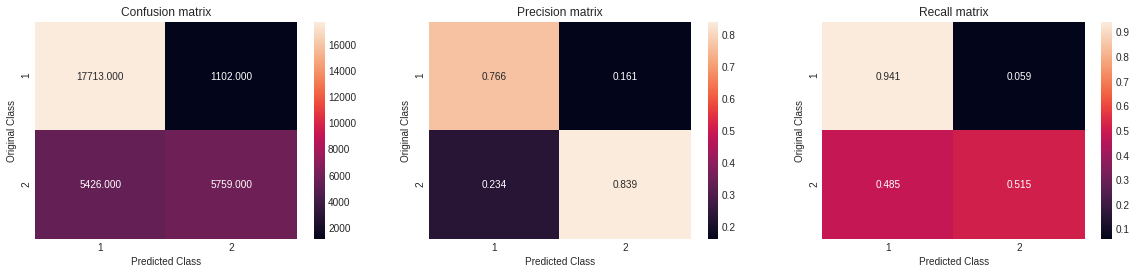

In [ ]:
# Calling 'ml' function for logistic regression

ml(tf_tr_f, tf_te_f, y_train, y_test, 'log')

In [ ]:
lg_tr_a = 1e-05
lg_te_a = 1e-05
lg_tr_log = 0.45
lg_te_log = 0.46

# Observation:

For train, best alpha we acquired is 1e-05 with log loss of 0.45.

For test, best alpha we acquired is 1e-05 with log loss of 0.44.

# Calling 'ml' function for linear SVM

For values of alpha =  1e-05 The loss is: 0.42143965648992465
For values of alpha =  0.0001 The loss is: 0.4201920186516796
For values of alpha =  0.001 The loss is: 0.4356925495289009
For values of alpha =  0.01 The loss is: 0.45087555830757825
For values of alpha =  0.1 The loss is: 0.4689878771949584
For values of alpha =  1 The loss is: 0.48906760703233654
For values of alpha =  10 The loss is: 0.545395256123119
For values of best alpha =  0.0001 The train log loss is: 0.40720543063126097
For values of best alpha =  0.0001 The test log loss is: 0.41484601969535084
Total number of data points : 30000


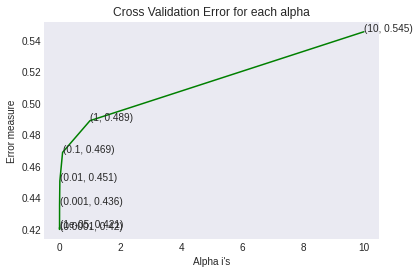

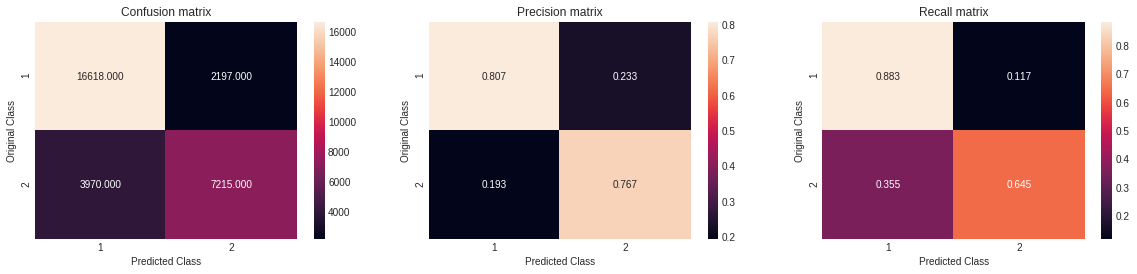

In [ ]:
# Calling 'ml' function for linear regression

ml(tf_tr_f, tf_te_f, y_train, y_test, 'hinge')

In [ ]:
ln_tr_a = 1e-05
ln_te_a = 1e-05
ln_tr_log = 0.42
ln_te_log = 0.42

# Observation:

For train, best alpha we acquired is 1e-05 with log loss of 0.42.

For test, best alpha we acquired is 1e-05 with log loss of 0.42.

#XGBOOST Algorithm


In [ ]:
dftw_100k = pd.read_csv('Quora_Final.csv')

In [ ]:
print("Columns in dftw_100k dataframe:\n")

print(dftw_100k.columns)

Columns in dftw_100k dataframe:

Index(['id', 'question1', 'question2', 'is_duplicate', 'freq_qid1',
       'freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words',
       'word_Common', 'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2',
       'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio'],
      dtype='object')


In [ ]:
dftw_100k['question1'] = dftw_100k['question1'].apply(lambda x: str(x))
dftw_100k['question2'] = dftw_100k['question2'].apply(lambda x: str(x))

In [ ]:
x_tw = dftw_100k.drop(['is_duplicate', 'id'], axis = 1)
y_tw = dftw_100k['is_duplicate']

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

x_train_tw, x_test_tw, y_train_tw, y_test_tw = train_test_split(x_tw, y_tw, test_size = 0.3, random_state = 0, shuffle = False)

In [ ]:
print("Shape of x train data:", x_train_tw.shape)
print("Shape of x test data:", x_test_tw.shape)
print("Shape of y train data:", y_train_tw.shape)
print("Shape of y test data:", y_test_tw.shape)

Shape of x train data: (70000, 28)
Shape of x test data: (30000, 28)
Shape of y train data: (70000,)
Shape of y test data: (30000,)


# With train data, creating list of questions TFIDF values

In [ ]:
# With train data, creating list of questions, dictionary of feature names and idf values

# Importing library
from sklearn.feature_extraction.text import TfidfVectorizer

# Merge texts
questions = list(x_train_tw['question1']) + list(x_train_tw['question2'])

tfidf = TfidfVectorizer(lowercase=False)
tfidf.fit_transform(questions)

# dict key:word and value:tf-idf score
word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))

- After we find TF-IDF scores, we convert each question to a weighted average of word2vec vectors by these scores.
- here we use a pre-trained GLOVE model which comes free with "Spacy".  https://spacy.io/usage/vectors-similarity
- It is trained on Wikipedia and therefore, it is stronger in terms of word semantics. 

#Defining a function 'vec' to create TF-IDF Weighted Word2Vec

In [ ]:
# Defining a function 'vec' to create TF-IDF Weighted Word2Vec

# Importing libraries
import os
import spacy
from tqdm import tqdm

def vec(xtw):

    # en_vectors_web_lg, which includes over 1 million unique vectors.
    nlp = spacy.load('en_core_web_sm')

    vecs = []
    
    # https://github.com/noamraph/tqdm
    # tqdm is used to print the progress bar
    for qu in tqdm(list(xtw)):
        
        doc = nlp(qu) 
        # 96 is the number of dimensions of vectors 
        mean_vec = np.zeros([len(doc), 96])
        
        for word in doc:
            # word2vec
            vec = word.vector
            # fetch df score
            
            try:
                idf = word2tfidf[str(word)]
                
            except:
                idf = 0
                
            # compute final vec
            mean_vec += vec * idf
            
        mean_vec = mean_vec.mean(axis = 0)
        vecs.append(mean_vec)
    #dftw_100k['q1_feats_m'] = list(vecs1)
    
    return vecs

# Calling 'vec' function

- <b>Data: train<b>
- <b>Column: question1<b>

In [ ]:
# Calling 'vec' function for train question1

x_train_tw['que1_tw'] = vec(x_train_tw['question1'])

100%|██████████| 70000/70000 [09:22<00:00, 124.40it/s]


- <b>Data: train<b>
- <b>Column: question2<b>

In [ ]:
# Calling 'vec' function for train question2

x_train_tw['que2_tw'] = vec(x_train_tw['question2'])

100%|██████████| 70000/70000 [09:57<00:00, 117.19it/s]


- <b>Data: test<b>
- <b>Column: question1<b>

In [ ]:
# Calling 'vec' function for test question1

x_test_tw['que1_tw'] = vec(x_test_tw['question1'])

100%|██████████| 30000/30000 [04:24<00:00, 113.62it/s]


- <b>Data: test
- <b>Column: question2<b>

In [ ]:
# Calling 'vec' function for test question2

x_test_tw['que2_tw'] = vec(x_test_tw['question2'])

100%|██████████| 30000/30000 [04:24<00:00, 113.56it/s]


In [ ]:
print("Type of x_train_tw['que1_tw']:", type(x_train_tw['que1_tw']))
print("Type of x_train_tw['que2_tw']:", type(x_train_tw['que2_tw']), '\n')
print("Type of x_test_tw['que1_tw']:", type(x_test_tw['que1_tw']))
print("Type of x_test_tw['que2_tw']:", type(x_test_tw['que2_tw']), '\n')

print("Shape of x train question1:", x_train_tw['que1_tw'].shape)
print("Shape of x test question1 data:", x_test_tw['que1_tw'].shape, '\n')


print("Shape of x train question2:", x_train_tw['que2_tw'].shape)
print("Shape of x test question2 data:", x_test_tw['que1_tw'].shape, '\n')

Type of x_train_tw['que1_tw']: <class 'pandas.core.series.Series'>
Type of x_train_tw['que2_tw']: <class 'pandas.core.series.Series'> 

Type of x_test_tw['que1_tw']: <class 'pandas.core.series.Series'>
Type of x_test_tw['que2_tw']: <class 'pandas.core.series.Series'> 

Shape of x train question1: (70000,)
Shape of x test question1 data: (30000,) 

Shape of x train question2: (70000,)
Shape of x test question2 data: (30000,) 



# Creating dataframe so as to get vectors

In [ ]:
# Train dataframe

x_tr_tw1 = pd.DataFrame(x_train_tw['que1_tw'].values.tolist(), index = x_train_tw.index)

x_tr_tw2 = pd.DataFrame(x_train_tw['que2_tw'].values.tolist(), index = x_train_tw.index,
                         columns = np.arange(x_tr_tw1.shape[1], x_tr_tw1.shape[1] * 2))


# Test dataframe

x_te_tw1 = pd.DataFrame(x_test_tw['que1_tw'].values.tolist(), index = x_test_tw.index)

x_te_tw2 = pd.DataFrame(x_test_tw['que2_tw'].values.tolist(), index = x_test_tw.index,
                         columns = np.arange(x_te_tw1.shape[1], x_te_tw1.shape[1] * 2))

# Concatinating question1 and question2 vectors with dataframe

In [ ]:
# Concatinating train question1 and train question2 vectors with dataframe

final_tr_tw = pd.concat([x_train_tw, x_tr_tw1, x_tr_tw2], axis = 1)

# Dropping question1 and question2 columns from final_test dataframe

final_te_tw = pd.concat([x_test_tw, x_te_tw1, x_te_tw2], axis = 1)

<b>Filling null values with 0 if there are any.

In [ ]:
# Filling train dataframe
final_tr_tw = final_tr_tw.fillna(0)

# Filling test dataframe
final_te_tw = final_te_tw.fillna(0)

<b>Dropping columns question1, question2, que1_tw, que2_tw<b>

In [ ]:
# Dropping question1 and question2 columns from final_train dataframe

final_tr_tw = final_tr_tw.drop(['question1', 'question2', 'que1_tw', 'que2_tw'], axis = 1)

# Dropping question1 and question2 columns from final_test dataframe

final_te_tw = final_te_tw.drop(['question1', 'question2', 'que1_tw', 'que2_tw'], axis = 1)

In [ ]:
print("Shape of final_tr_tw dataframe:", final_tr_tw.shape, '\n')

print("Shape of final_te_tw dataframe:", final_te_tw.shape, '\n')

Shape of final_tr_tw dataframe: (70000, 218) 

Shape of final_te_tw dataframe: (30000, 218) 



In [ ]:
# Saving final train data
final_tr_tw.to_csv("quora_final_tr_tw.csv")

# Saving final test data
final_te_tw.to_csv("quora_final_te_tw.csv")

# XGBOOST

In [ ]:
# Import libraries
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import log_loss

start = dt.now()

# Parameters we need to try are
param_grid = {'n_estimators' : [5, 10, 100, 500], 'max_depth' : [2, 5, 8, 10]}

rs_k = RandomizedSearchCV(estimator = XGBClassifier(objective = 'binary:logistic', eval_metric = 'logloss', eta = 0.02),
                          param_distributions = param_grid)

# fit train sets
rs_k.fit(final_tr_tw, y_train_tw)

# Prediction
predict_tw = rs_k.predict(final_te_tw)

print("Time taken to run this cell:", dt.now() - start)

Time taken to run this cell: 4:08:09.227663


In [ ]:
bp = rs_k.best_params_
bs = rs_k.best_score_

print("Optimal hyperParameter:", bp, '\n')
print("Maximum accuracy:", bs * 100)

Optimal hyperParameter: {'n_estimators': 500, 'max_depth': 10} 

Maximum accuracy: 83.49857142857144


<b>Confusion Matrix<b>

Total number of data points : 30000


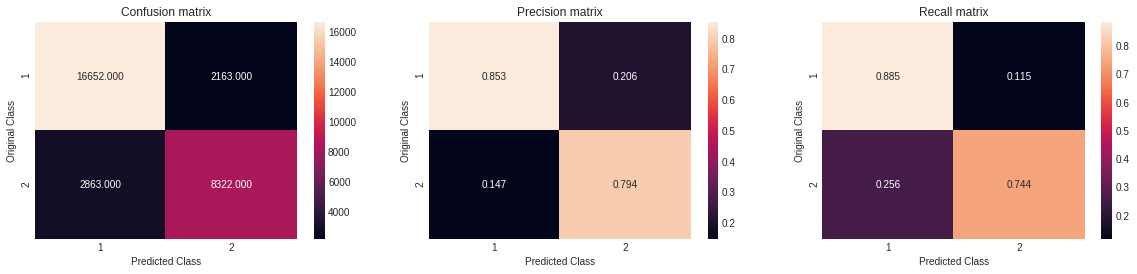

In [ ]:
predicted_y = np.array(predict_tw > 0.5, dtype = int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test_tw, predicted_y)

<b>Hyperparameters<b>
    
 - max_depth: 10
 
 - n_estimators: 100

In [ ]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 10
params['n_estimators'] = 100

d_train = xgb.DMatrix(final_tr_tw, label= y_train_tw)
d_test = xgb.DMatrix(final_te_tw, label = y_test_tw)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20)

xgdmat = xgb.DMatrix(final_tr_tw,y_train_tw)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test_tw, predict_y, eps=1e-15))

[0]	train-logloss:0.682095	valid-logloss:0.683263
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[1]	train-logloss:0.671555	valid-logloss:0.673725
[2]	train-logloss:0.661347	valid-logloss:0.664701
[3]	train-logloss:0.651562	valid-logloss:0.65594
[4]	train-logloss:0.641828	valid-logloss:0.64746
[5]	train-logloss:0.632615	valid-logloss:0.639271
[6]	train-logloss:0.623669	valid-logloss:0.631372
[7]	train-logloss:0.615032	valid-logloss:0.623821
[8]	train-logloss:0.606743	valid-logloss:0.616573
[9]	train-logloss:0.59871	valid-logloss:0.609463
[10]	train-logloss:0.590765	valid-logloss:0.602604
[11]	train-logloss:0.583242	valid-logloss:0.595989
[12]	train-logloss:0.575897	valid-logloss:0.589637
[13]	train-logloss:0.568723	valid-logloss:0.583479
[14]	train-logloss:0.561808	valid-logloss:0.577482
[15]	train-logloss:0.555095	valid-logloss:0.571704
[16]	train-logloss:0.548623	valid-logloss:0.56

In [ ]:
n_est = 100
max_dep = 10
xg_tr_log = 0.18
xg_te_log = 0.32

# Pretty Table

In [ ]:
lg_tr_a = 1e-05
lg_te_a = 1e-05
lg_tr_log = 0.45
lg_te_log = 0.46

In [ ]:
ln_tr_a = 1e-05
ln_te_a = 1e-05
ln_tr_log = 0.42
ln_te_log = 0.42

In [ ]:
from prettytable import PrettyTable

a = PrettyTable()

a.field_names = ['Algorithm', 'Vectorizer', 'Train Alpha', 'Train log_loss', 'Test Alpha', 'Test log_loss']

a.add_row(['Logistic Regression', 'TF-IDF', lg_tr_a, lg_tr_log, lg_te_a, lg_te_log])
a.add_row(['Linear SVM', 'TF-IDF', ln_tr_a, ln_tr_log, ln_te_a, ln_te_log])

print()
print(a.get_string(title = 'Table for Logistic and Linear regression'))

print('\n')


+---------------------+------------+-------------+----------------+------------+---------------+
|      Algorithm      | Vectorizer | Train Alpha | Train log_loss | Test Alpha | Test log_loss |
+---------------------+------------+-------------+----------------+------------+---------------+
| Logistic Regression |   TF-IDF   |    1e-05    |      0.45      |   1e-05    |      0.46     |
|      Linear SVM     |   TF-IDF   |    1e-05    |      0.42      |   1e-05    |      0.42     |
+---------------------+------------+-------------+----------------+------------+---------------+




In [ ]:


from prettytable import PrettyTable

b = PrettyTable()

b.field_names = ['Algorithm', 'Vectorizer', 'Maximum Depth', 'Estimators', 'Train log_loss', 'Test log_loss']

b.add_row(['XGBoost', 'TF-IDF Weighted Word2Vec', max_dep, n_est, xg_tr_log, xg_te_log])

print(b.get_string(title = 'Table for XGBoost'))

+-----------+--------------------------+---------------+------------+----------------+---------------+
| Algorithm |        Vectorizer        | Maximum Depth | Estimators | Train log_loss | Test log_loss |
+-----------+--------------------------+---------------+------------+----------------+---------------+
|  XGBoost  | TF-IDF Weighted Word2Vec |       10      |    100     |      0.18      |      0.32     |
+-----------+--------------------------+---------------+------------+----------------+---------------+


# Conclusion:
    
 - <b>Logistic Regression<b>

With train alpha of 1e-05, train log loss is 0.45. With test alpha of 1e-05, test log loss is 0.46

 - <b>Linear SVM<b>

With train alpha of 1e-05, train log loss is 0.42. With test alpha of 1e-05, test log loss is 0.46

 - <b>XGBoost<b>
    
With maximum depth of 10 and estimators of 100, train log loss is 0.18 and test log loss is 0.32.

# Overall Conclusion:
    
We can conclude that XGBoost resulted in less log loss i.e 0.18 for train and 0.32 for test.

XGBoost algorithm is better over logistic and linear regression algorithm.


# Step-by-Step Procedure

# Exploratory Data Analysis

 - Import the Quora dataset.
 - Exploring the data with size of dataframe, number of rows, number of columns, unique values, type of data and info of data.
 - Graphical representation of number of unique values, unique question pairs.
 - Removing duplicates, filling null values if any.
 
 
# Basic Feature Engineering
 
 - ____freq_qid1____ = Frequency of qid1's
 - ____freq_qid2____ = Frequency of qid2's 
 - ____q1len____ = Length of q1
 - ____q2len____ = Length of q2
 - ____q1_n_words____ = Number of words in Question 1
 - ____q2_n_words____ = Number of words in Question 2
 - ____word_Common____ = (Number of common unique words in Question 1 and Question 2)
 - ____word_Total____ =(Total num of words in Question 1 + Total num of words in Question 2)
 - ____word_share____ = (word_common)/(word_Total)
 - ____freq_q1+freq_q2____ = sum total of frequency of qid1 and qid2 
 - ____freq_q1-freq_q2____ = absolute difference of frequency of qid1 and qid2 
 
After applying basic feature engineering, exploring the dataset as follows:

 - ____Plotting Word_Share:____ Word share is nothing but the common words divided by total words (common words/total words)
 - ____Plotting Common:____ (Number of common unique words in Question 1 and Question 2)
 
# Text Preprocessing:

- Remove HTML tag
- Remove punctuations and numbers
- Remove URLs
- Expanding contraction words
- Stop-word removal
- Stemming
- Change it to lowercase and join it

# Advance Feature Engineering

Definition:
- __Token__: You get a token by splitting sentence a space
- __Stop_Word__ : stop words as per NLTK.
- __Word__ : A token that is not a stop_word


Features:
- __cwc_min__ :  Ratio of common_word_count to min lenghth of word count of Q1 and Q2 <br>cwc_min = common_word_count / (min(len(q1_words), len(q2_words))


- __cwc_max__ :  Ratio of common_word_count to max lenghth of word count of Q1 and Q2 <br>cwc_max = common_word_count / (max(len(q1_words), len(q2_words))


- __csc_min__ :  Ratio of common_stop_count to min lenghth of stop count of Q1 and Q2 <br> csc_min = common_stop_count / (min(len(q1_stops), len(q2_stops))


- __csc_max__ :  Ratio of common_stop_count to max lenghth of stop count of Q1 and Q2<br>csc_max = common_stop_count / (max(len(q1_stops), len(q2_stops))


- __ctc_min__ :  Ratio of common_token_count to min lenghth of token count of Q1 and Q2<br>ctc_min = common_token_count / (min(len(q1_tokens), len(q2_tokens))


- __ctc_max__ :  Ratio of common_token_count to max lenghth of token count of Q1 and Q2<br>ctc_max = common_token_count / (max(len(q1_tokens), len(q2_tokens))
        

- __last_word_eq__ :  Check if First word of both questions is equal or not<br>last_word_eq = int(q1_tokens[-1] == q2_tokens[-1])


- __first_word_eq__ :  Check if First word of both questions is equal or not<br>first_word_eq = int(q1_tokens[0] == q2_tokens[0])
        

- __abs_len_diff__ :  Abs. length difference<br>abs_len_diff = abs(len(q1_tokens) - len(q2_tokens))


- __mean_len__ :  Average Token Length of both Questions<br>mean_len = (len(q1_tokens) + len(q2_tokens))/2


- __longest_substr_ratio__ :  Ratio of length longest common substring to min lenghth of token count of Q1 and Q2 longest_substr_ratio = len(longest common substring) / (min(len(q1_tokens), len(q2_tokens))


# Data Analysis After Advance Feature Engineering

 - Pair plot of features ['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'] in order to understand how well question pairs can be separated.
 
 - Distribution plot and violin is plotted to analyse how well question pars can be separated.
 
# T-SNE:

 - We are applying T-SNE to reduce dimension and visualize with 2 dimension and 3 dimension to understand how well question pairs can be separated.
    
# Creating Final Dataframe:

 - We have obtained 3 dataframes i.e 1- original dataframe, 2- Basic feature engineering dataframe and 3- Advance feature engineering dataframe.
 
 - We will concatinate/merge all 3 dataframes and then remove unwanted columns from it.
 
# Machine Learning: Logistic and Linear Regression

 - __Data Preparation__-
     - __Train Test Split__- Data is splitted into train and test set.
     - __TFIDF Vectorizer__- Vectorised question1 and question2 of train and test set.
     - __Merge vectorized question pairs__- Vectorized questions pairs are are merged with final dataframe and dropping question1 and question2 which has text data.
     

 - ____Logistic Regression____-
     - Applying Logistic Regression to find the log loss as least as possible.
     - Then visualizing the result with confusion matrix, precision and recall with heatmap.
     
 
 - ____Linear Regression____-
     - Applying Linear Regression to find the log loss as least as possible.
     - Then visualizing the result with confusion matrix, precision and recall with heatmap.
 
 
# Machine Learning: XGBOOST

 - __Data Preparation__-
 
     - __Train Test Split__- Data is splitted into train and test set.
     - __TFIDF Vectorizer__- Vectorised question1 and question2 of train and test set.
     - __TFIDF Weighted Word2Vec__- Applying TFIDF Weighted Word2Vec on question pairs to get the text data in vector form.
     

- ___XGBOOST___-
 
     - Applying XGBOOST to find the log loss as least as possible.
     - Then visualizing the result with confusion matrix, precision and recall with heatmap.
     
# Pretty Table:

 - Pretty table is to represent the acquired log loss values corresponding to vectorizer.
     
# Conclusion:

 - Comparing the log loss for Logistic Regression, Linear Regression and XGBOOST and then find the best machine algorithm on the basis on least log loss.
 
 - In above case, we found XGBOOST to be best algorithm as it gave less log loss when compared to Logistic and Linear Regression.